In [1]:
import pandas as pd
import numpy as np

from util import comparar_columnas, eliminar_caracteristicas, prueba_umbral
from feature_selection import *

In [2]:
def get_selected_features(binary_vector, feature_names):
    """
    Convert binary vector to list of selected feature names
    
    Args:
        binary_vector: List of 0s and 1s
        feature_names: List of feature names
        
    Returns:
        List of selected feature names
    """
    return [feature for feature, selected in zip(feature_names, binary_vector) if selected == 1]

In [3]:
final = pd.read_csv('final_dataframe.csv', index_col=False)
final

,PIRange_Bulkd.0-5cm.tif,PIRange_Bulkd.100-200cm.tif,PIRange_Bulkd.15-30cm.tif,PIRange_Bulkd.30-60cm.tif,PIRange_Bulkd.5-15cm.tif,PIRange_Bulkd.60-100cm.tif,PIRange_Clay.0-5cm.tif,PIRange_Clay.100-200cm.tif,PIRange_Clay.15-30cm.tif,PIRange_Clay.30-60cm.tif,...,Tex_Class.0-5cm.tif,Tex_Class.100-200cm.tif,Tex_Class.15-30cm.tif,Tex_Class.30-60cm.tif,Tex_Class.5-15cm.tif,Tex_Class.60-100cm.tif,Valor,PP,valor_humedad_suelo1,slope
0,0.609,0.689,0.483,0.641,0.550,0.650,22.358000,32.235001,22.490000,26.009001,...,8.0,8.0,8.0,8.0,4.0,8.0,0,13.532034,0.421875,32.357300
1,0.609,0.689,0.483,0.641,0.550,0.650,22.358000,32.235001,22.490000,26.009001,...,8.0,8.0,8.0,8.0,4.0,8.0,0,238.139918,0.438995,32.357300
2,0.595,0.753,0.484,0.621,0.497,0.706,23.513000,32.325001,25.268002,31.559998,...,8.0,8.0,7.0,7.0,7.0,7.0,0,32.059045,0.520004,37.497812
3,0.589,0.682,0.482,0.614,0.498,0.656,25.056000,45.129002,25.813000,32.742996,...,10.0,1.0,9.0,1.0,1.0,1.0,0,0.000000,0.478973,36.717389
4,0.659,0.689,0.573,0.675,0.553,0.660,21.844999,30.417000,18.743000,21.934999,...,8.0,4.0,8.0,8.0,8.0,4.0,0,2.191190,0.438095,60.517945
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3143,0.604,0.687,0.502,0.631,0.512,0.663,25.153999,44.474998,24.527000,31.266998,...,2.0,2.0,2.0,1.0,1.0,1.0,1,48.621181,0.437820,42.533329
3144,0.587,0.701,0.478,0.612,0.556,0.676,25.213001,43.882000,24.993999,31.622002,...,2.0,2.0,2.0,2.0,2.0,1.0,1,66.050648,0.436722,42.533329
3145,0.587,0.701,0.478,0.612,0.556,0.676,25.213001,43.882000,24.993999,31.622002,...,2.0,2.0,2.0,2.0,2.0,1.0,1,66.050648,0.436722,42.533329
3146,0.587,0.701,0.478,0.612,0.556,0.676,25.213001,43.882000,24.993999,31.622002,...,2.0,2.0,2.0,2.0,2.0,1.0,1,163.471828,0.438995,42.533329


In [4]:
corr_features = [
    'alpha.0-5cm', 'ksat_0-5cm', 'PIRange_Sand.0-5cm', 'alpha_0-5cm', 
    'ksat_5-15cm', 'PIRange_Sand.15-30cm', 'alpha_5-15cm', 'ksat_15-30cm', 
    'PIRange_Sand.60-100cm', 'alpha_15-30cm', 'ksat_60-100cm', 'PP', 
    'AvMoist.0-5cm', 'ksat_100-200cm', 'PWP.0-5cm', 'AvMoist.5-15cm', 
    'n_0-5cm', 'PWP.100-200cm', 'AvMoist.60-100cm', 'n_5-15cm', 'slope', 
    'Bulkd.0-5cm', 'n_15-30cm', 'Tex_Class.0-5cm', 'Bulkd.5-15cm', 
    'n_60-100cm', 'Tex_Class.5-15cm', 'Bulkd.60-100cm', 'n_100-200cm', 
    'Tex_Class.15-30cm', 'Clay.0-5cm', 'PIRange_Bulkd.0-5cm', 
    'Tex_Class.100-200cm', 'Clay.5-15cm', 'PIRange_Bulkd.5-15cm', 
    'theta_s_0-5cm', 'Clay.15-30cm', 'PIRange_Bulkd.60-100cm', 
    'theta_s_5-15cm', 'FC.0-5cm', 'PIRange_Clay.0-5cm', 'theta_s_15-30cm', 
    'FC.5-15cm', 'PIRange_Clay.5-15cm', 'theta_s_60-100cm', 'FC.60-100cm', 
    'PIRange_Clay.15-30cm', 'VMoist', 'Valor'
]

In [5]:
corr_features[47] = 'valor_humedad_suelo1'

corr_features[47]

'valor_humedad_suelo1'

In [6]:
# Prueba de características eliminadas a parti de diferentes valores de umbrales
umbrales = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.99]
resultados = prueba_umbral(final, umbrales=umbrales)
print(resultados)

   Umbral  Caracteristicas eliminadas
0    0.10                         136
1    0.20                         135
2    0.30                         131
3    0.40                         130
4    0.50                         128
5    0.60                         128
6    0.70                         122
7    0.80                         113
8    0.90                          91
9    0.99                          38


In [7]:
# Se reduce el df según el valor de umbral elegido
df_reducido, num_eliminadas = eliminar_caracteristicas(final, 0.90)
#final = df_reducido
print(f'Dimensión del df después de eliminación por umbral: {final.shape}')

Dimensión del df después de eliminación por umbral: (3148, 137)


In [6]:
final.columns = final.columns.str.replace('.tif', '')
final = final[corr_features]
final.Valor

0       0
1       0
2       0
3       0
4       0
       ..
3143    1
3144    1
3145    1
3146    1
3147    1
Name: Valor, Length: 3148, dtype: int64

In [7]:
cart_feature_selection(final, 'Valor', n_features=15, n_cv_folds=3)

Fitting 3 folds for each of 53760 candidates, totalling 161280 fits

Resultados del modelo:
Mejores hiperparámetros encontrados:
- class_weight: balanced
- max_depth: 15
- max_features: None
- min_impurity_decrease: 0.0
- min_samples_leaf: 1
- min_samples_split: 4
- min_weight_fraction_leaf: 0.0

Precisión del modelo: 0.7333
Error del modelo: 0.2667 ± 0.0345


{'selected_features': ['valor_humedad_suelo1',
  'slope',
  'theta_s_60-100cm',
  'PIRange_Bulkd.5-15cm',
  'PP',
  'Clay.15-30cm',
  'PIRange_Bulkd.60-100cm',
  'Clay.5-15cm',
  'PIRange_Sand.15-30cm',
  'PIRange_Sand.60-100cm',
  'PIRange_Clay.15-30cm',
  'n_0-5cm',
  'n_15-30cm',
  'AvMoist.0-5cm',
  'ksat_60-100cm'],
 'best_params': {'class_weight': 'balanced',
  'max_depth': 15,
  'max_features': None,
  'min_impurity_decrease': 0.0,
  'min_samples_leaf': 1,
  'min_samples_split': 4,
  'min_weight_fraction_leaf': 0.0},
 'accuracy': 0.7333333333333333,
 'error': 0.2666666666666667,
 'error_margin': 0.03445553029076307,
 'model': DecisionTreeClassifier(class_weight='balanced', max_depth=15,
                        min_samples_split=4, random_state=42)}

- obtener valores de cada generación, al final calcular valor mínimo y valor medio
- guardar todas las poblaciones de cada generación
- guardar los 4 mejores individuos de cada generación
- 


c:\Users\ivo\.conda\envs\geotiff\lib\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
c:\Users\ivo\.conda\envs\geotiff\lib\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


Guardando en resultados_ga/all_features_totalfeatures_ga_random_forest_mutflip_0_3_mutprob_0_3_cpx_0_5/all_features_totalfeatures_ga_random_forest_mutflip_0_3_mutprob_0_3_cpx_0_5.csv
Generación 0: {'avg': 0.6705077030812325, 'min': 0.5547852474323063}
Guardando en resultados_ga/all_features_totalfeatures_ga_random_forest_mutflip_0_3_mutprob_0_3_cpx_0_5/all_features_totalfeatures_ga_random_forest_mutflip_0_3_mutprob_0_3_cpx_0_5.csv
Generación 1: {'avg': 0.6352491830065359, 'min': 0.5547852474323063}
Guardando en resultados_ga/all_features_totalfeatures_ga_random_forest_mutflip_0_3_mutprob_0_3_cpx_0_5/all_features_totalfeatures_ga_random_forest_mutflip_0_3_mutprob_0_3_cpx_0_5.csv
Generación 2: {'avg': 0.598077147525677, 'min': 0.5410830999066293}
Guardando en resultados_ga/all_features_totalfeatures_ga_random_forest_mutflip_0_3_mutprob_0_3_cpx_0_5/all_features_totalfeatures_ga_random_forest_mutflip_0_3_mutprob_0_3_cpx_0_5.csv
Generación 3: {'avg': 0.5940400326797386, 'min': 0.53029878618

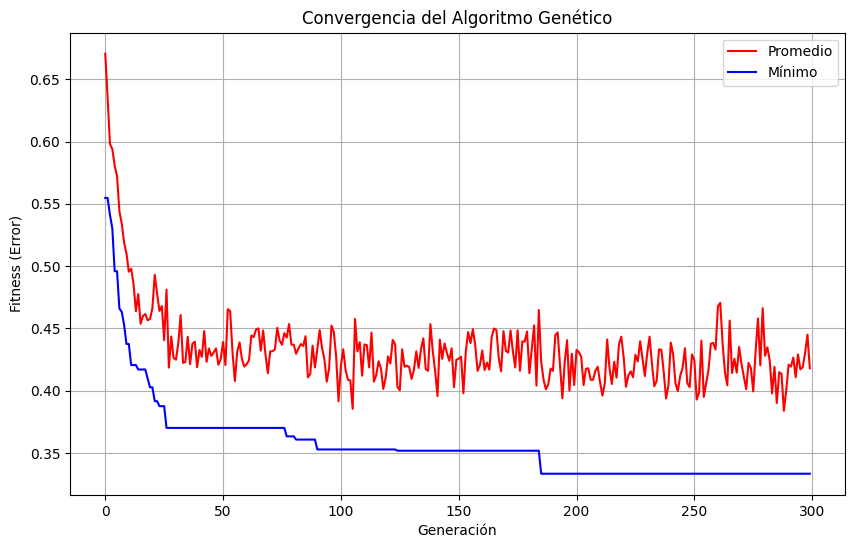

Mejores características seleccionadas: [[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1], [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1], [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0

In [8]:
import os
model_name = 'random_forest'
mutFlipBit = 0.3
mut_prob = 0.3
cruce_prob = 0.5
path = f"resultados_ga/all_features_totalfeatures_ga_{model_name}_mutflip_{str(mutFlipBit).replace('.','_')}_mutprob_{str(mut_prob).replace('.','_')}_cpx_{str(cruce_prob).replace('.','_')}"
os.makedirs(path, exist_ok=True)
target_column = 'Valor'
mejores_caracteristicas, logbook, hof = seleccion_caracteristicas_genetico(final, target_column, n_generations=300, population_size=40,
                                       outputpath = path, mutFlipBit=mutFlipBit, mut_prob=mut_prob, cruce_prob=cruce_prob)
fig = plot_convergence(logbook=logbook)
fig.savefig(f'{path}/convergence_plot.png', 
            dpi=300, 
            bbox_inches='tight')

df = final.drop(columns='Valor')
best_solution = hof[0]
features = df.columns
selected_features = get_selected_features(best_solution, features)

print("Mejores características seleccionadas:", mejores_caracteristicas)
print("Mejor fitness:", hof[0].fitness.values[0])

output_file = f"{path}/resultados.txt"

with open(output_file, 'w') as f:
    f.write('Features seleccionadas\n')
    for feature in selected_features:
        f.write(feature + '\n')
    f.write(f'Mejor Fitness: {hof[0].fitness.values[0]}')

print(f"Resultados guardados en {output_file}")

In [9]:
len(mejores_caracteristicas[0])

136

In [10]:
carac = len(hof[0])
df = final.drop(columns='Valor')

In [11]:
def get_selected_features(binary_vector, feature_names):
    """
    Convert binary vector to list of selected feature names
    
    Args:
        binary_vector: List of 0s and 1s
        feature_names: List of feature names
        
    Returns:
        List of selected feature names
    """
    return [feature for feature, selected in zip(feature_names, binary_vector) if selected == 1]

# Assuming you have the best solution from hof
best_solution = hof[0]  # Get best individual from HallOfFame
#features = ['PIRange_7Bulkd.100-200cm.tif', 'PIRange_Sand.0-5cm.tif', 'PIRange_Sand.100-200cm.tif', 
#           'PIRange_Sand.15-30cm.tif', 'alpha_15-30cm.tif', 'alpha_5-15cm.tif', 'AvMoist.100-200cm.tif',
#           'FC.0-5cm.tif', 'FC.100-200cm.tif', 'ksat_60-100cm.tif', 'n_0-5cm.tif', 'n_5-15cm.tif',
#           'n_60-100cm.tif', 'PWP.0-5cm.tif', 'theta_s_100-200cm.tif', 'alpha.0-5cm.tif',
#           'valor_humedad_suelo1', 'slope']
features = df.columns
selected_features = get_selected_features(best_solution, features)
print("Selected features:")
for feature in selected_features:
    print(f"- {feature}")

Selected features:
- PIRange_Clay.100-200cm
- PIRange_Sand.0-5cm
- PIRange_Sand.100-200cm
- alpha_30-60cm
- AWC_5-15cm
- AWC_60-100cm
- ksat_15-30cm
- theta_r_0-5cm
- theta_r_5-15cm
- alpha.0-5cm
- alpha.15-30cm
- alpha.60-100cm
- ksat.0-5cm
- theta_r.30-60cm
- theta_s.100-200cm
- theta_s.30-60cm
- Bulkd.0-5cm
- Bulkd.30-60cm
- Bulkd.5-15cm
- Clay.30-60cm
- Clay.5-15cm
- Sand.5-15cm
- Sand.60-100cm
- Tex_Class.0-5cm
- PP
- valor_humedad_suelo1
- slope


In [ ]:
#['PIRange_Bulkd.100-200cm.tif', 'PIRange_Sand.0-5cm.tif', 'PIRange_Sand.100-200cm.tif', 'PIRange_Sand.15-30cm.tif', 'alpha_15-30cm.tif', 'alpha_5-15cm.tif', 'AvMoist.100-200cm.tif', 'FC.0-5cm.tif', 'FC.100-200cm.tif', 'ksat_60-100cm.tif', 'n_0-5cm.tif', 'n_5-15cm.tif', 'n_60-100cm.tif', 'PWP.0-5cm.tif', 'theta_s_100-200cm.tif', 'alpha.0-5cm.tif', 'valor_humedad_suelo1', 'slope']

In [9]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.calibration import calibration_curve
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
import matplotlib.pyplot as plt

def entrenar_y_evaluar_modelos(df, columna_objetivo):
    # Separar características y variable objetivo
    X = df.drop(columns=[columna_objetivo])
    y = df[columna_objetivo]

    # Dividir el conjunto de datos en entrenamiento y prueba
    X_entrenamiento, X_prueba, y_entrenamiento, y_prueba = train_test_split(
        X, y, test_size=0.3, random_state=42
    )

    # Normalizar los datos
    scaler = StandardScaler()
    X_entrenamiento_normalizado = scaler.fit_transform(X_entrenamiento)
    X_prueba_normalizado = scaler.transform(X_prueba)

    # Guardar valores de normalización
    valores_normalizacion = {'mean': scaler.mean_, 'scale': scaler.scale_}

    # Definir los modelos y sus hiperparámetros para GridSearchCV
    modelos = {
        'Regresión Logística': {
            'modelo': LogisticRegression(),
            'parametros': {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'solver': ['lbfgs', 'liblinear']}
        },
        'Naive Bayes': {
            'modelo': GaussianNB(),
            'parametros': {}
        },
        'SVC': {
            'modelo': SVC(probability=True),
            'parametros': {'C': [0.01, 0.1, 1, 10,100, 200], 'kernel': ['poly', 'rbf'],'gamma': ['scale', 'auto', 0.1, 0.01, 0.001]}
        },
        'Random Forest': {
            'modelo': RandomForestClassifier(),
            'parametros': {'n_estimators': [100, 200,300], 'max_depth': [None, 10, 20,30, 40,50]}
        },
        'XGBoost': {
            'modelo': XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
            'parametros': {'n_estimators': [100, 200, 300],'learning_rate': [0.01, 0.01, 0.1],}
        },
        'CatBoost': {
            'modelo': CatBoostClassifier(verbose=0),
            'parametros': {'iterations': [100, 200, 300], 'learning_rate': [0.01, 0.01, 0.1]}
        }
    }

    metricas = {}
    calibracion_curvas = {}
    prob_pos_dict = {}

    for nombre, item in modelos.items():
        modelo = item['modelo']
        parametros = item['parametros']

        # Ajustar hiperparámetros si hay parámetros definidos
        if parametros:
            grid = GridSearchCV(modelo, parametros, cv=5, scoring='accuracy', n_jobs=-1)
            grid.fit(X_entrenamiento_normalizado, y_entrenamiento)
            mejor_modelo = grid.best_estimator_
        else:
            modelo.fit(X_entrenamiento_normalizado, y_entrenamiento)
            mejor_modelo = modelo

        # Predecir probabilidades
        if hasattr(mejor_modelo, "predict_proba"):
            prob_pos = mejor_modelo.predict_proba(X_prueba_normalizado)[:, 1]
        else:
            prob_pos = mejor_modelo.decision_function(X_prueba_normalizado)
            prob_pos = (prob_pos - prob_pos.min()) / (prob_pos.max() - prob_pos.min())

        # Guardar datos para la curva de calibración
        fraccion_positivos, probabilidad_media = calibration_curve(
            y_prueba, prob_pos, n_bins=10
        )
        calibracion_curvas[nombre] = (probabilidad_media, fraccion_positivos)

        # Guardar probabilidades para histograma
        prob_pos_dict[nombre] = prob_pos

        # Predecir etiquetas
        y_pred = mejor_modelo.predict(X_prueba_normalizado)

        # Calcular métricas
        tn, fp, fn, tp = confusion_matrix(y_prueba, y_pred).ravel()
        sensibilidad = tp / (tp + fn)
        especificidad = tn / (tn + fp)
        precision = accuracy_score(y_prueba, y_pred)

        metricas[nombre] = {
            'Sensibilidad': sensibilidad,
            'Especificidad': especificidad,
            'Precisión': precision,
            'Mejores Hiperparámetros': grid.best_params_ if parametros else 'No aplicable'
        }

    # Graficar todas las curvas de calibración en un solo gráfico
    plt.figure(figsize=(8, 6))
    for nombre, (prob_media, fraccion_pos) in calibracion_curvas.items():
        plt.plot(prob_media, fraccion_pos, marker='o', label=nombre)
    plt.plot([0, 1], [0, 1], "k:", label="Calibración perfecta")
    plt.xlabel('Probabilidad media predicha')
    plt.ylabel('Fracción de positivos')
    plt.title('Curva de Calibración para todos los modelos')
    plt.legend()
    plt.show()

    # Colores para los histogramas
    colors = ['blue', 'green', 'red', 'purple', 'orange', 'cyan']

    # Graficar histogramas de probabilidades predichas en una cuadrícula de 3x2 con colores diferentes
    fig, axs = plt.subplots(3, 2, figsize=(12, 15))
    axs = axs.ravel()
    for idx, (nombre, probs) in enumerate(prob_pos_dict.items()):
        axs[idx].hist(probs, bins=10, edgecolor='k', color=colors[idx % len(colors)])
        axs[idx].set_title(f'Distribución de Probabilidades - {nombre}')
        axs[idx].set_xlabel('Probabilidad predicha')
        axs[idx].set_ylabel('Frecuencia')
    plt.tight_layout()
    plt.show()

    return metricas, valores_normalizacion

In [10]:
final.columns =final.columns.str.replace('.tif', '')
final

,alpha.0-5cm,ksat_0-5cm,PIRange_Sand.0-5cm,alpha_0-5cm,ksat_5-15cm,PIRange_Sand.15-30cm,alpha_5-15cm,ksat_15-30cm,PIRange_Sand.60-100cm,alpha_15-30cm,...,FC.0-5cm,PIRange_Clay.0-5cm,theta_s_15-30cm,FC.5-15cm,PIRange_Clay.5-15cm,theta_s_60-100cm,FC.60-100cm,PIRange_Clay.15-30cm,valor_humedad_suelo1,Valor
0,0.427,303.553986,36.184998,0.012,315.993988,30.825001,0.015,267.717987,44.574001,0.011,...,0.370,22.358000,0.631,0.269,29.282999,0.572,0.321,22.490000,0.421875,0
1,0.427,303.553986,36.184998,0.012,315.993988,30.825001,0.015,267.717987,44.574001,0.011,...,0.370,22.358000,0.631,0.269,29.282999,0.572,0.321,22.490000,0.438995,0
2,0.293,371.622986,36.636002,0.006,211.750000,31.510998,0.009,291.281006,46.751999,0.008,...,0.411,23.513000,0.623,0.409,24.007999,0.553,0.383,25.268002,0.520004,0
3,0.129,166.621002,34.499001,0.005,78.719002,31.039001,0.009,174.261002,37.791000,0.006,...,0.473,25.056000,0.613,0.457,26.689999,0.591,0.454,25.813000,0.478973,0
4,0.429,275.221985,36.883003,0.013,239.182999,31.253002,0.017,309.858002,42.887001,0.013,...,0.289,21.844999,0.523,0.274,21.226999,0.553,0.283,18.743000,0.438095,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3143,0.149,78.428001,36.001999,0.006,66.454002,30.672001,0.006,82.512001,43.591999,0.006,...,0.426,25.153999,0.551,0.418,27.872997,0.605,0.464,24.527000,0.437820,1
3144,0.167,266.264008,36.520000,0.004,90.331001,31.712999,0.005,236.319000,46.224998,0.006,...,0.476,25.213001,0.618,0.420,26.219002,0.578,0.440,24.993999,0.436722,1
3145,0.167,266.264008,36.520000,0.004,90.331001,31.712999,0.005,236.319000,46.224998,0.006,...,0.476,25.213001,0.618,0.420,26.219002,0.578,0.440,24.993999,0.436722,1
3146,0.167,266.264008,36.520000,0.004,90.331001,31.712999,0.005,236.319000,46.224998,0.006,...,0.476,25.213001,0.618,0.420,26.219002,0.578,0.440,24.993999,0.438995,1


c:\Users\ivo\.conda\envs\geotiff\lib\site-packages\xgboost\core.py:158: UserWarning: [18:36:00] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


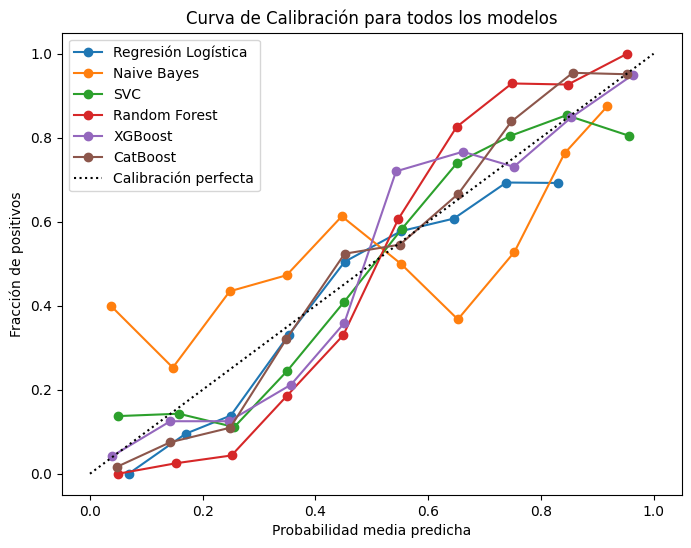

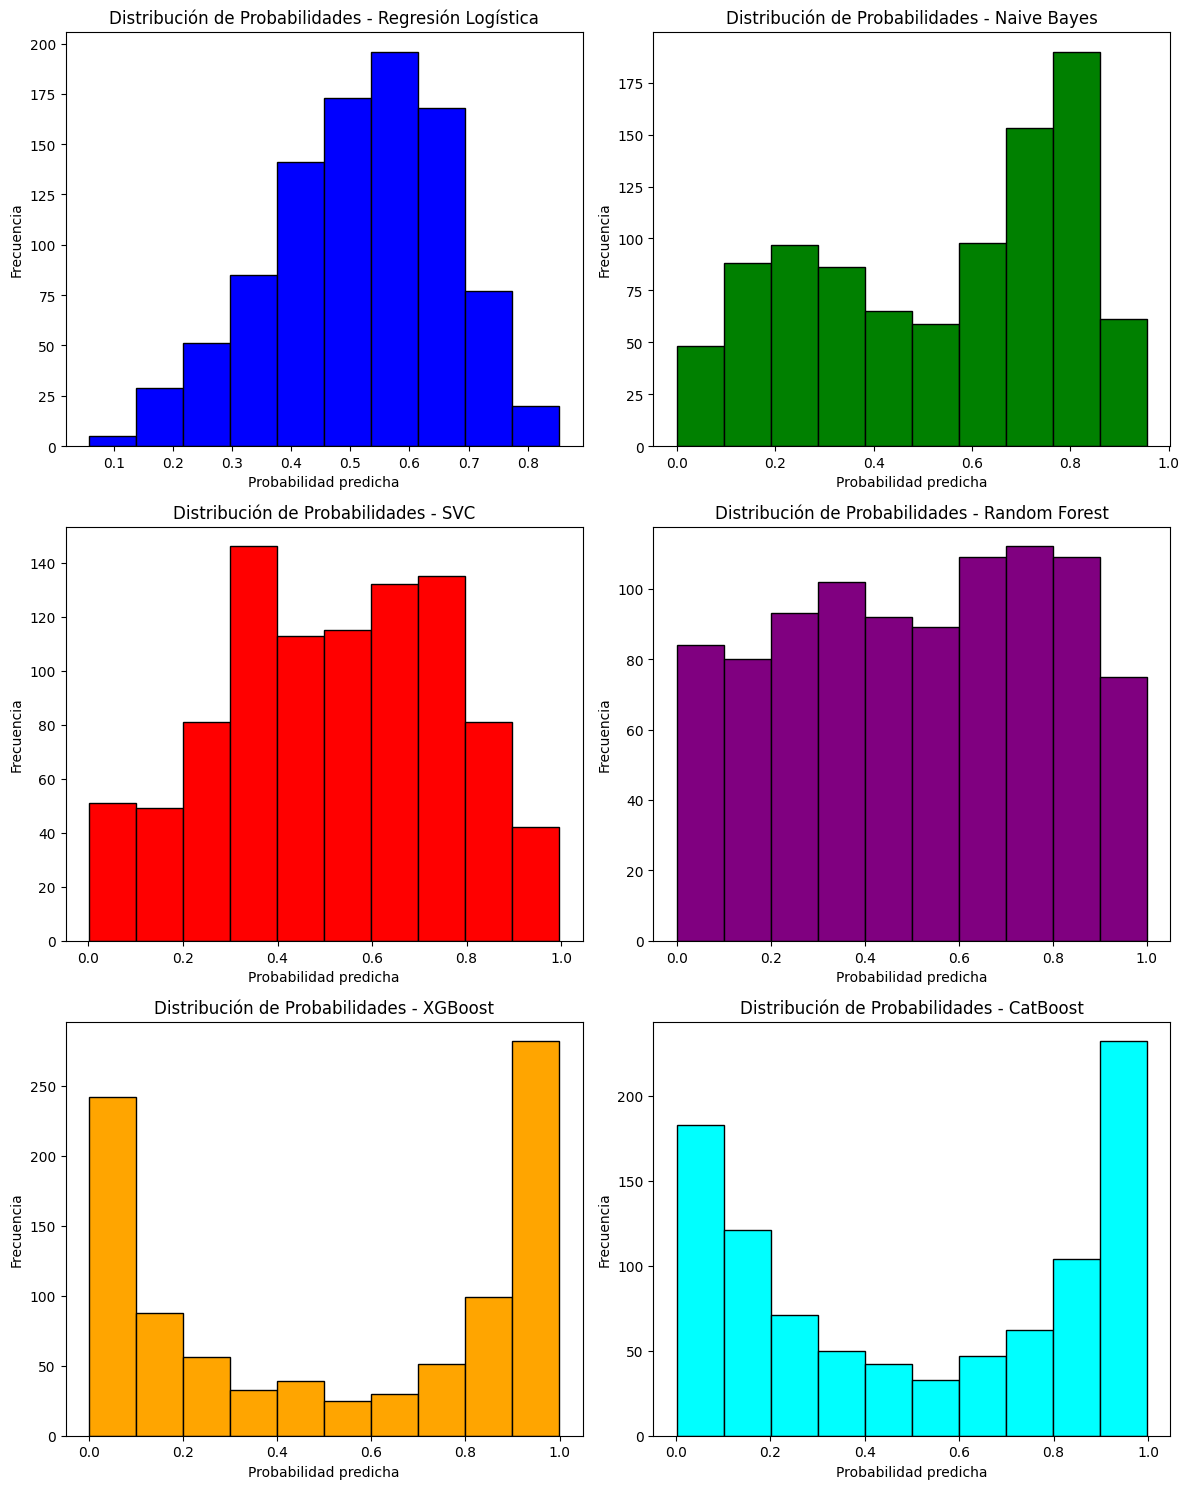

In [18]:
columns = ['PP',
'ksat_100-200cm',
'AvMoist.60-100cm',
'slope',
'Tex_Class.15-30cm',
'PIRange_Bulkd.5-15cm',
'Clay.15-30cm',
'valor_humedad_suelo1',
'Valor']
df_final = final[columns]
target = 'Valor'
metricas, valores_normalizacion = entrenar_y_evaluar_modelos(df_final, target)

In [ ]:
metricas

{'Regresión Logística': {'Sensibilidad': 0.6325678496868476,
  'Especificidad': 0.575107296137339,
  'Precisión': 0.6042328042328042,
  'Mejores Hiperparámetros': {'C': 0.01, 'solver': 'lbfgs'}},
 'Naive Bayes': {'Sensibilidad': 0.6200417536534447,
  'Especificidad': 0.5901287553648069,
  'Precisión': 0.6052910052910053,
  'Mejores Hiperparámetros': 'No aplicable'},
 'SVC': {'Sensibilidad': 0.7515657620041754,
  'Especificidad': 0.7188841201716738,
  'Precisión': 0.7354497354497355,
  'Mejores Hiperparámetros': {'C': 100, 'gamma': 'scale', 'kernel': 'rbf'}},
 'Random Forest': {'Sensibilidad': 0.8622129436325678,
  'Especificidad': 0.8626609442060086,
  'Precisión': 0.8624338624338624,
  'Mejores Hiperparámetros': {'max_depth': 20, 'n_estimators': 300}},
 'XGBoost': {'Sensibilidad': 0.872651356993737,
  'Especificidad': 0.8776824034334764,
  'Precisión': 0.8751322751322751,
  'Mejores Hiperparámetros': {'learning_rate': 0.1, 'n_estimators': 300}},
 'CatBoost': {'Sensibilidad': 0.8622129

In [29]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
import joblib
import json
import os

def entrenar_y_guardar_modelos(df, columna_objetivo, ruta_guardado):
    # Separar características y variable objetivo
    X = df.drop(columns=[columna_objetivo])
    y = df[columna_objetivo]
    
    # Dividir el conjunto de datos en entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=42
    )
    
    # Definir los modelos y sus hiperparámetros para GridSearchCV
    modelos = {
        'RandomForest': {
            'modelo': RandomForestClassifier(random_state=42),
            'parametros': {
                # Parámetros relacionados con la estructura de los árboles
                'n_estimators': [100, 200, 300, 500],
                'max_depth': [3, 5, 7, 10, 15, 20, None],
                'min_samples_split': [2, 5, 10, 15, 20],
                'min_samples_leaf': [1, 2, 4, 6, 8],
                
                # Parámetros de aleatoriedad y features
                'max_features': ['sqrt', 'log2', None],
                'bootstrap': [True, False],
                'random_state': [42],
                
                # Parámetros de regularización y peso
                'max_leaf_nodes': [None, 50, 100, 200],
                'min_weight_fraction_leaf': [0.0, 0.1, 0.2],
                'min_impurity_decrease': [0.0, 0.01, 0.05],
                
                # Parámetros de paralelización
                'n_jobs': [-1]  # Usa todos los cores disponibles
            }
        },
        'SVC': {
            'modelo': SVC(probability=True, random_state=42),
            'parametros': {
                'C': [0.1, 1, 2, 10, 100],  # Parámetro de penalización
                'kernel': ['rbf'],  # Tipos de kernel
                'gamma': ['scale', 'auto', 0.01, 0.1, 1,10,20,30,50,100],
                'random_state': [42],  # Reproducibilidad
            }
        },
        'XGBoost': {
            'modelo': XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
            'parametros': {
                # Parámetros de estructura del árbol
                'max_depth': [3, 5, 7, 9, 11, 13],
                'min_child_weight': [1, 3, 5, 7],
                'gamma': [0, 0.1, 0.2, 0.3, 0.4],
                
                # Parámetros de regulación
                'learning_rate': [0.01, 0.05, 0.1, 0.15, 0.2],
                'n_estimators': [100, 200, 300, 500],
                'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
                'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
                
                # Parámetros de regularización
                'reg_alpha': [0, 0.1, 0.5, 1.0],
                'reg_lambda': [0.1, 0.5, 1.0, 1.5, 2.0],
                
                # Parámetros de balanceo
                'scale_pos_weight': [1, 3, 5],
                
                # Otros parámetros
                'random_state': [42]
            }
        }
    }
    
    metricas = {}
    
    for nombre, item in modelos.items():
        modelo = item['modelo']
        parametros = item['parametros']
        
        # Crear un Pipeline que incluye el escalado y el modelo
        pipeline = Pipeline([
            ('scaler', StandardScaler()),
            ('classifier', modelo)
        ])
        
        # Realizar la búsqueda de hiperparámetros
        grid = GridSearchCV(
            pipeline,
            parametros,
            cv=3,
            scoring='accuracy',
            n_jobs=-1,
            verbose=1
        )
        grid.fit(X_train, y_train)
        mejor_modelo = grid.best_estimator_
        
        # Guardar el mejor modelo en un archivo .pkl
        #nombre_archivo_modelo = os.path.join(ruta_guardado, f"{nombre}_mejor_modelo.pkl")
        #joblib.dump(mejor_modelo, nombre_archivo_modelo)
        
        # Predecir en el conjunto de prueba
        y_pred = mejor_modelo.predict(X_test)
        
        # Calcular métricas
        tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
        sensibilidad = tp / (tp + fn)  # Recall
        especificidad = tn / (tn + fp)  # Specificity
        precision = precision_score(y_test, y_pred)
        exactitud = accuracy_score(y_test, y_pred)
        
        metricas[nombre] = {
            'Sensibilidad': sensibilidad,
            'Especificidad': especificidad,
            'Precisión': precision,
            'Exactitud': exactitud,
            'Mejores Hiperparámetros': grid.best_params_
        }
        
        # Añadir los nombres de las características al modelo
        mejor_modelo.named_steps['classifier'].feature_names = X_train.columns.tolist()
    
    # Guardar las métricas en un archivo .txt
#    nombre_archivo_metricas = os.path.join(ruta_guardado, 'metricas_modelos.txt')
#    with open(nombre_archivo_metricas, 'w') as file:
#        json.dump(metricas, file, indent=4)
    
    return metricas

In [30]:
columns = ['PP',
'valor_humedad_suelo1',
'Valor']
df_final = final[columns]
target = 'Valor'
path_guardar = 'resultados_ga/millaray'
entrenar_y_guardar_modelos(df_final, target, path_guardar)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Fitting 5 folds for each of 36 candidates, totalling 180 fits
Fitting 5 folds for each of 30 candidates, totalling 150 fits


c:\Users\ivo\.conda\envs\geotiff\lib\site-packages\xgboost\core.py:158: UserWarning: [16:15:39] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


{'RandomForest': {'Sensibilidad': 0.8935281837160751,
  'Especificidad': 0.8927038626609443,
  'Precisión': 0.895397489539749,
  'Exactitud': 0.8931216931216931,
  'Mejores Hiperparámetros': {'classifier__max_depth': 30,
   'classifier__min_samples_split': 2,
   'classifier__n_estimators': 200}},
 'SVC': {'Sensibilidad': 0.7098121085594989,
  'Especificidad': 0.4334763948497854,
  'Precisión': 0.5629139072847682,
  'Exactitud': 0.5735449735449736,
  'Mejores Hiperparámetros': {'classifier__C': 10,
   'classifier__gamma': 'scale',
   'classifier__kernel': 'rbf'}},
 'XGBoost': {'Sensibilidad': 0.8830897703549061,
  'Especificidad': 0.8454935622317596,
  'Precisión': 0.8545454545454545,
  'Exactitud': 0.8645502645502645,
  'Mejores Hiperparámetros': {'classifier__learning_rate': 0.1,
   'classifier__max_depth': 15,
   'classifier__n_estimators': 200}}}

In [62]:
import joblib
import pandas as pd

  # Reemplaza con tu ruta

# Cargar el scaler
scaler = joblib.load(f'{path_guardar}/scaler.pkl')

# Cargar el modelo (por ejemplo, el mejor modelo de XGBoost)
modelo = joblib.load(f'{path_guardar}/SVC_mejor_modelo.pkl')


# Visualizar las primeras filas con las predicciones
modelo.feature_names_in_

array(['ksat_0-5cm', 'PP', 'PWP.100-200cm', 'slope', 'Bulkd.5-15cm',
       'valor_humedad_suelo1'], dtype=object)

In [13]:
import pandas as pd
df = pd.read_csv('resultados_ga/all_features_totalfeatures_ga_random_forest_mutflip_0_3_mutprob_0_3_cpx_0_5/all_features_totalfeatures_ga_random_forest_mutflip_0_3_mutprob_0_3_cpx_0_5.csv')
df.rename(columns={df.columns[-1]: 'VMoist'}, inplace=True)
df.columns

Index(['PIRange_Bulkd.0-5cm', 'PIRange_Bulkd.100-200cm',
       'PIRange_Bulkd.15-30cm', 'PIRange_Bulkd.30-60cm',
       'PIRange_Bulkd.5-15cm', 'PIRange_Bulkd.60-100cm', 'PIRange_Clay.0-5cm',
       'PIRange_Clay.100-200cm', 'PIRange_Clay.15-30cm',
       'PIRange_Clay.30-60cm',
       ...
       'Silt.60-100cm', 'Tex_Class.0-5cm', 'Tex_Class.100-200cm',
       'Tex_Class.15-30cm', 'Tex_Class.30-60cm', 'Tex_Class.5-15cm',
       'Tex_Class.60-100cm', 'PP', 'valor_humedad_suelo1', 'VMoist'],
      dtype='object', length=136)

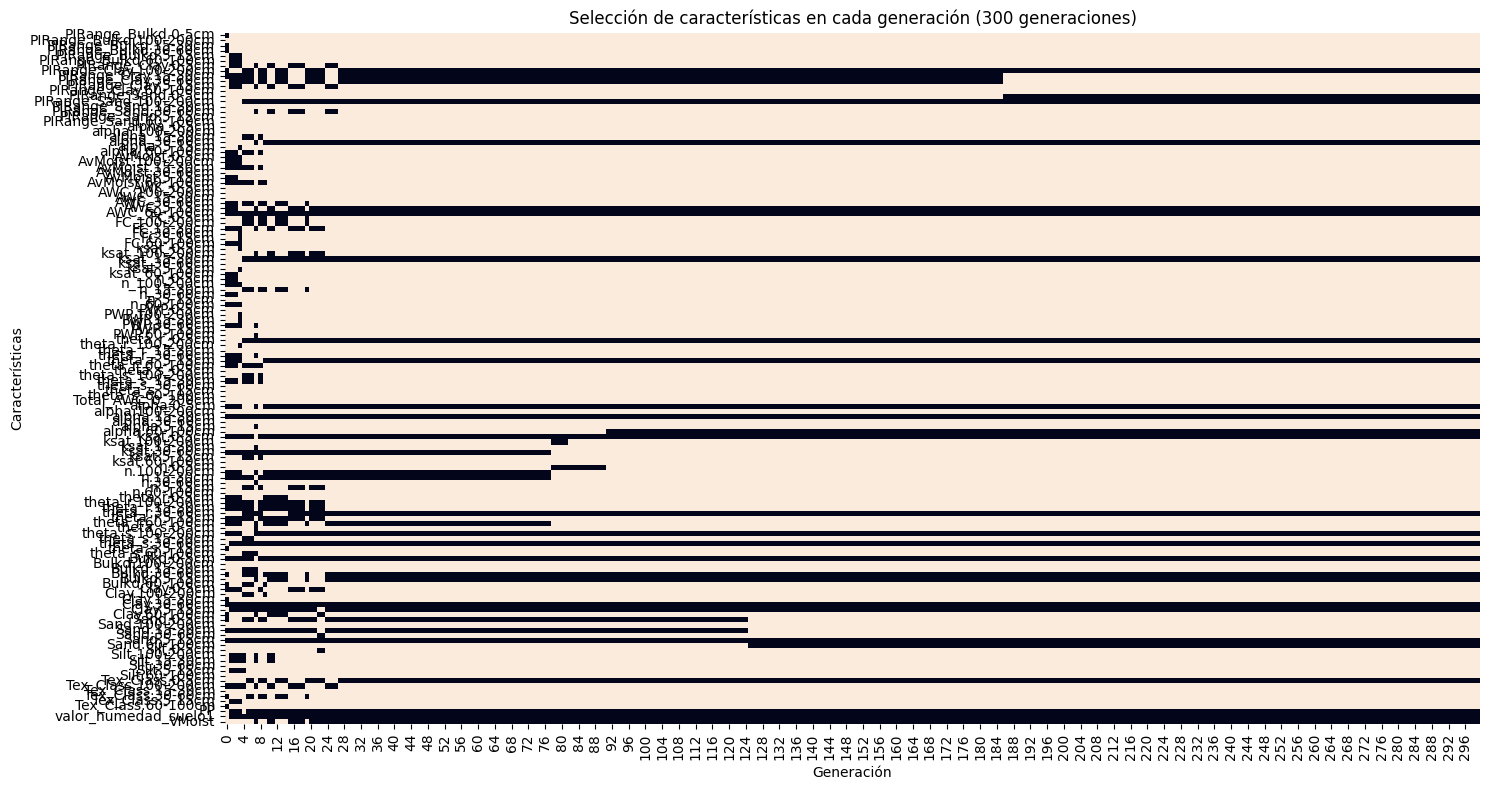


Resumen estadístico de la selección de características:
                         Frecuancia de selección  Primera Generación  \
PIRange_Bulkd.0-5cm                        0.003                   1   
PIRange_Bulkd.100-200cm                    0.000                   0   
PIRange_Bulkd.15-30cm                      0.003                   1   
PIRange_Bulkd.30-60cm                      0.003                   1   
PIRange_Bulkd.5-15cm                       0.010                   0   
...                                          ...                 ...   
Tex_Class.5-15cm                           0.010                   0   
Tex_Class.60-100cm                         0.003                   1   
PP                                         0.993                   0   
valor_humedad_suelo1                       0.997                   0   
VMoist                                     0.957                   0   

                         Última Generación  
PIRange_Bulkd.0-5cm              

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Get best individual from each generation (first row of each 40)
best_individuals = df.iloc[::40].reset_index(drop=True)

# Create figure
plt.figure(figsize=(15, 8))

# Create heatmap
sns.heatmap(best_individuals.T, 
            cmap='rocket_r',
            cbar_kws={'label': 'Seleccionada (1) / No seleccionada (0)'},
            cbar=False,
            yticklabels=best_individuals.columns,)


# Set titles and labels
plt.title('Selección de características en cada generación (300 generaciones)')
plt.xlabel('Generación')
plt.ylabel('Características')

plt.tight_layout()
plt.show()

print("\nResumen estadístico de la selección de características:")
summary = pd.DataFrame({
    'Frecuancia de selección': best_individuals.mean(),
    'Primera Generación': best_individuals.iloc[0],
    'Última Generación': best_individuals.iloc[-1]
}).round(3)
print(summary)

In [20]:
summary.sort_values(ascending=False)

TypeError: sort_values() missing 1 required positional argument: 'by'